## LEAD SCORING ASSIGNMENT 
### Problem Statement
Company X Education is an online education plateform which specialises in selling online courses to industry professionals. The company has its course on various various websites and search engines. People who fill up details related to them (such as name, phone number, email address etc) or are referred by other clients are considered as leads (potential clients). X Education receives plenty of leads, however the leads being converted into clients is extremely low. In a 100 leads per day, only 30 of them are converted to clients.

### Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



In [3]:
#import libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Reading the Data set

In [4]:
leads = pd.read_csv('Leads.csv')

In [5]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#check for shape of data

leads.shape 

(9240, 37)

In [7]:
# There are total 9240 rows and 37 columns in the data set

In [8]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## EXPLORATORY DATA ANALYSIS

### Data understanding, preparation

In [10]:
# Checking for unique id 

sum(leads.duplicated(subset='Prospect ID'))

0

<div class="alert-info">
It shows that Prospect ID feature is unique for each row

 </div>

In [11]:
# Checking for conversion rate

leads.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

<div class="alert-info">
From the dataset, we can see that conversion rate is almost 39%

 </div>

In [12]:
#Before checking null values, lets replace `Select` with NaN

leads = leads.replace('Select', np.nan)

round(100*leads.isnull().sum()/leads.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

<div class="alert-info">
From the above results, we can see that columns with more than 45% missing values can be dropped.
    
- How did you hear about X Education
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score


 </div>

In [13]:
leads.drop(['Lead Profile','Prospect ID','How did you hear about X Education','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)
leads.head(3)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened


In [14]:
#checking missing values again
round(100*leads.isnull().sum()/leads.shape[0],2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

## Categorical Attributes Analysis:

In [15]:
# 1. Analysing Lead Origin feature

leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

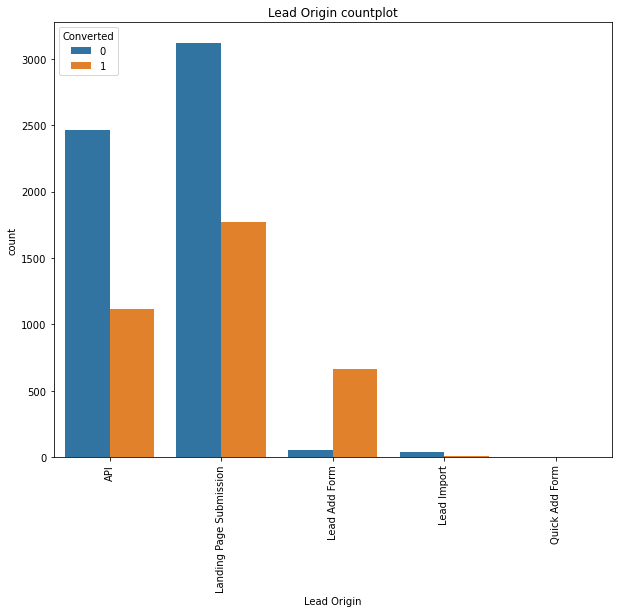

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(leads['Lead Origin'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.title('Lead Origin countplot')
plt.show()

<div class="alert-info">
    
From the above graph, we can see that
- Lead import and Quick Add Form brought very few leads
- API and Landing Page Submission brought more number of leads and conversions are also more. However, conversions for these two Lead Origin can be improved
- Lead Add Form has very high conversion rate but count of leads is less. 
 </div>

In [17]:
# 2.Analysing Lead Source feature

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [18]:
#combining Spell mistake ,missing values and low frequency values into others category

leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Social Media', 'Facebook')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'Click2call','Press_Release', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'], 'Others')

leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Others                57
Name: Lead Source, dtype: int64

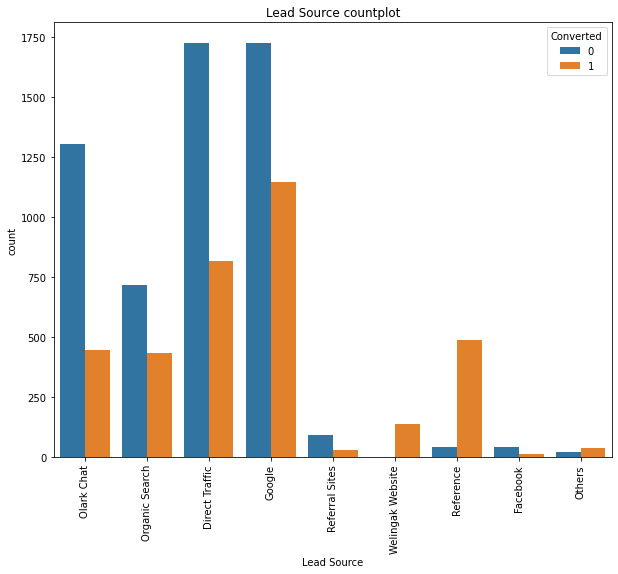

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(leads['Lead Source'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.title('Lead Source countplot')
plt.show()

<div class="alert-info">
    
From the above graph, we can see that
- Conversion rate is higher for Reference and Welingak Website
- High number of leads received through Direct Traffic, Google and Olark Chat
- Focus should be on getting more leads through Reference and Welingak Website, and improving conversion rate for Direct Traffic, Google, Organic Search and Olark Chat
    <div class="alert-info">

In [20]:
#3.lets analyse `Do Not Email` and 'Do Not Call' features

leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [21]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [22]:
#`Do Not Call` feature contains only 2 Yes's, hence we can delete this column
leads.drop('Do Not Call', 1, inplace=True)
leads.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened


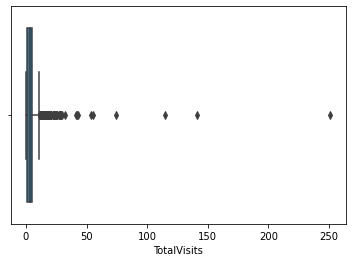

In [23]:
#4.lets analyze TotalVisits numerical column

sns.boxplot(leads['TotalVisits'])
plt.show()

In [24]:
#From the above graph, we can see that there are outliers in TotalVisits column.

leads['TotalVisits'].quantile([0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

0.00      0.0
0.25      1.0
0.50      3.0
0.75      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

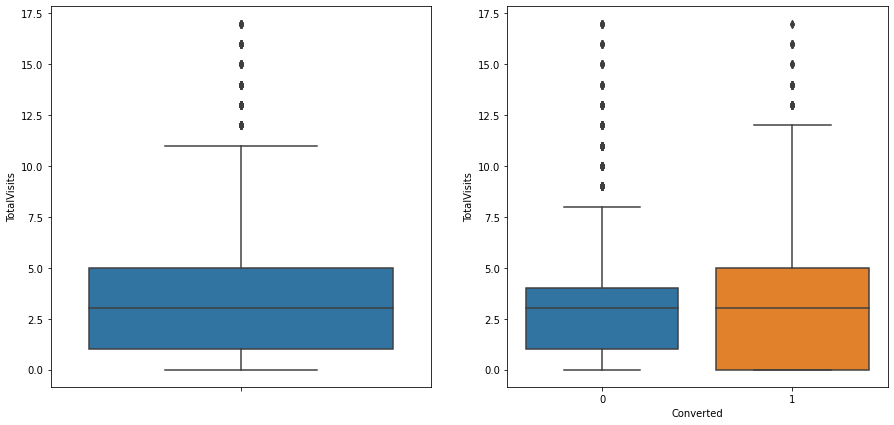

In [25]:
#As there are having higher values in TotalVisits column above 0.99 and will remove them as part of outlier treatment
leads = leads[leads['TotalVisits'] <= leads['TotalVisits'].quantile(0.99)]

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(y=leads['TotalVisits'])

plt.subplot(1,2,2)
sns.boxplot(data=leads, x='Converted', y='TotalVisits')

plt.show()

<div class="alert-info">
Major outliers treatment done and medians are at same level as observed above .
    <div class="alert-info">

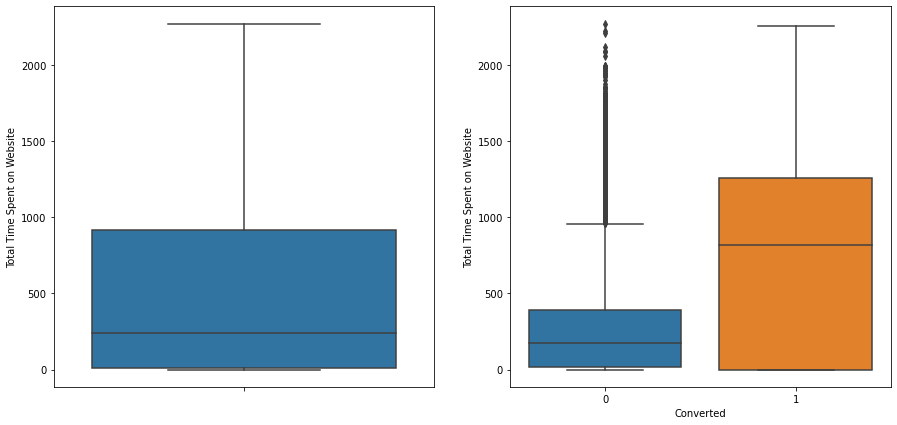

In [26]:
#5. lets analyse 'Total Time Spent on Website' numerical column

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(y=leads['Total Time Spent on Website'])

plt.subplot(1,2,2)
sns.boxplot(data=leads, x= 'Converted' , y='Total Time Spent on Website')
plt.show()

<div class="alert-info">
There is no any potential outliers observed for outlier treatment .
    <div class="alert-info">

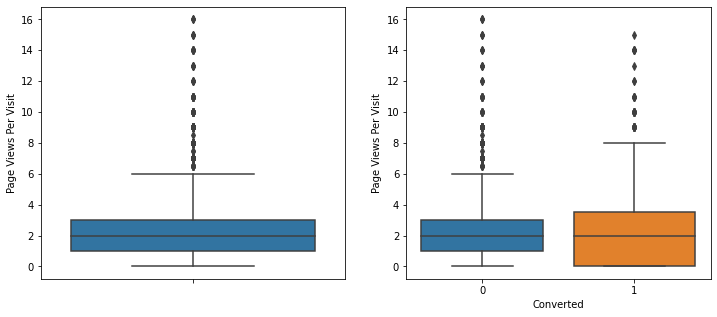

In [27]:
#6.lets analyse 'Page Views Per Visit' column
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=leads['Page Views Per Visit'])

plt.subplot(1,2,2)
sns.boxplot(data=leads, x='Converted', y='Page Views Per Visit')

plt.show()

In [28]:
leads['Page Views Per Visit'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

0.25     1.0
0.50     2.0
0.75     3.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    16.0
Name: Page Views Per Visit, dtype: float64

In [29]:
#outlier treatment on 'Page Views Per Visit' column
leads = leads[leads['Page Views Per Visit'] <= leads['Page Views Per Visit'].quantile(0.99)]

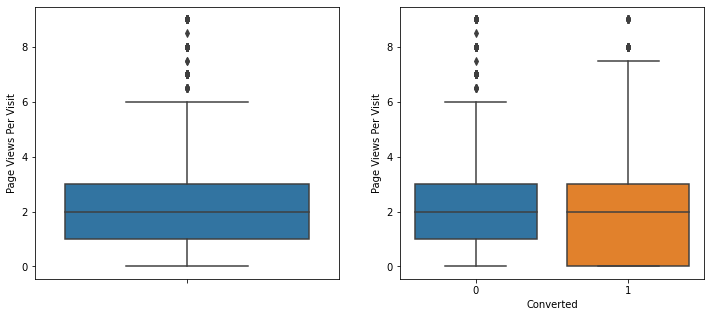

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=leads['Page Views Per Visit'])

plt.subplot(1,2,2)
sns.boxplot(data=leads, x='Converted', y='Page Views Per Visit')

plt.show()

<div class="alert-info">
Major outliers treatment done and medians are at same level for both as observed above .
    <div class="alert-info">

In [31]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3390
SMS Sent                        2700
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
#7.lets analyse 'Last Activity' column

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3390
SMS Sent                        2700
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [33]:
#Lets Club last activity into others where count is less than 90 to simplfy the analysis 

leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable', 'Unreachable', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'],'Others')
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        127
Form Submitted on Website     114
Unsubscribed                   60
Name: Last Activity, dtype: int64

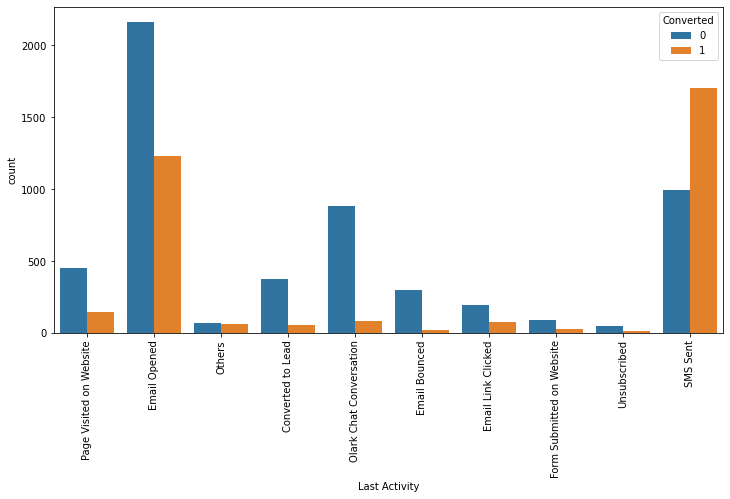

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Last Activity'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

<div class="alert-info">
    
From the above graph, we can see that conversion rate is higher where Last Activity is 'SMS Sent'.

Conversion rate need to be increased for all other customers majorrly for Email opened,


In [35]:
#8.lets analyse country column
leads['Country'].value_counts(dropna=False)

India                   6347
NaN                     2323
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
South Africa               4
Kuwait                     4
Germany                    4
unknown                    4
Nigeria                    4
Canada                     4
Sweden                     3
China                      2
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Italy                      2
Ghana                      2
Bangladesh                 2
Philippines                2
Liberia                    1
Vietnam                    1
Denmark                    1
Switzerland                1
Russia                     1
Netherlands                1
Malaysia      

In [36]:
#We can see that most of the rows contain value as India and unknown. this value is not changing for many records, hence it can be dropped

leads.drop('Country',1,inplace=True)

leads.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened


In [37]:
#9.Lets analyse Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3284
Finance Management                    945
Human Resource Management             820
Marketing Management                  815
Operations Management                 495
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 151
E-COMMERCE                            107
Hospitality Management                107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [38]:
#replace missing values with new category other Specialization
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Other Specialization')
leads['Specialization'].value_counts(dropna=False)

Other Specialization                 3284
Finance Management                    945
Human Resource Management             820
Marketing Management                  815
Operations Management                 495
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 151
E-COMMERCE                            107
Hospitality Management                107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

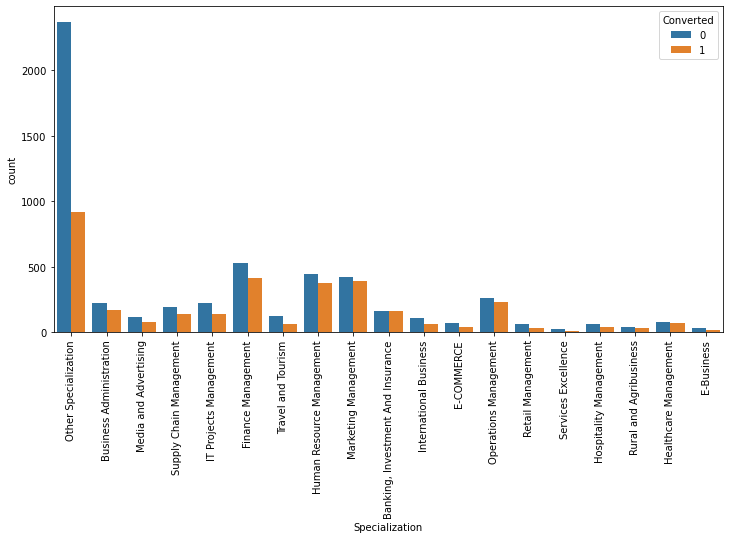

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Specialization'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

In [40]:
# lets club all management specializations into one category as its looks similar conversion and is also a same stream .
leads['Specialization'] = leads['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'Management')

leads['Specialization'].value_counts(dropna=False)

Management                           4126
Other Specialization                 3284
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [41]:
#10. lets analyse 'What is your current occupation' column

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5410
NaN                     2643
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [42]:
#replace missing values with mode as its more important factor for customer conversion

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,leads['What is your current occupation'].mode()[0])
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8053
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

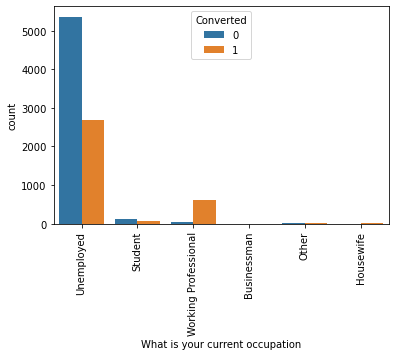

In [43]:
sns.countplot(leads['What is your current occupation'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

<div class="alert-info">
    
-From the above graph, we can see that conversion rate is high for Working Professional.

-Company received more leads from Unemployed people in terms of absolute numbers

In [44]:
#11. lets analyse 'What matters most to you in choosing a course' column

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6290
NaN                          2661
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [45]:
# There is a major misiing values and only 1 other answer to compare which will not hwlp in analysis and can be dropped 
leads.drop('What matters most to you in choosing a course',1,inplace=True)

In [46]:
#12. lets analyse Search column
leads['Search'].value_counts(dropna=False)

No     8940
Yes      13
Name: Search, dtype: int64

In [47]:
#From the above data, we can conclude that Search is imbalanced column, hence we can drop it
leads.drop('Search',1,inplace=True)

In [48]:
#13. lets analyse Magazine column
leads['Magazine'].value_counts(dropna=False)

No    8953
Name: Magazine, dtype: int64

In [49]:
# Magazine is has only column
leads.drop('Magazine',1,inplace=True)

In [50]:
#14. lets analyse Newspaper Article column

leads['Newspaper Article'].value_counts()

No     8952
Yes       1
Name: Newspaper Article, dtype: int64

In [51]:
# Newspaper Article is imbalanced column
leads.drop('Newspaper Article',1,inplace=True)

In [52]:
#15. lets analyse X Education Forums column
leads['X Education Forums'].value_counts()

No    8953
Name: X Education Forums, dtype: int64

In [53]:
# X Education Forums has only column
leads.drop('X Education Forums',1,inplace=True)

In [54]:
#16. lets analyse Newspaper column
leads['Newspaper'].value_counts(dropna=False)

No     8952
Yes       1
Name: Newspaper, dtype: int64

In [55]:
# Newspaper is imbalanced column
leads.drop('Newspaper',1,inplace=True)

In [56]:
#17. lets analyse Digital Advertisement column
leads['Digital Advertisement'].value_counts(dropna=False)

No     8950
Yes       3
Name: Digital Advertisement, dtype: int64

In [57]:
# Digital Advertisement is imbalanced column
leads.drop('Digital Advertisement', 1, inplace=True)

In [58]:
# 18 lets analyse Through Recommendations column
leads['Through Recommendations'].value_counts(dropna=False)

No     8947
Yes       6
Name: Through Recommendations, dtype: int64

In [59]:
# Through Recommendations is imbalanced column
leads.drop('Through Recommendations', 1, inplace=True)

In [60]:
# 19 lets analyse Through Receive More Updates About Our Courses column

leads['Receive More Updates About Our Courses'].value_counts(dropna=False)


No    8953
Name: Receive More Updates About Our Courses, dtype: int64

In [61]:
# Receive More Updates About Our Courses is imbalanced column

leads.drop('Receive More Updates About Our Courses', 1, inplace=True)

In [62]:
# 20 lets analyse 'Update me on Supply Chain Content' column

leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    8953
Name: Update me on Supply Chain Content, dtype: int64

In [63]:
# Update me on Supply Chain Content has only column

leads.drop('Update me on Supply Chain Content', 1, inplace=True)

In [64]:
#21 lets analyse 'Get updates on DM Content' column
leads['Get updates on DM Content'].value_counts(dropna=False)

No    8953
Name: Get updates on DM Content, dtype: int64

In [65]:
# Get updates on DM Content has only column

leads.drop('Get updates on DM Content', 1, inplace=True)

In [66]:
#22 lets analyse 'Get updates on DM Content' column

leads['Tags'].value_counts(dropna=False)

NaN                                                  3284
Will revert after reading the email                  2002
Ringing                                              1162
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          169
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    26
in touch with 

In [67]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not mentioned')

leads['Tags'] = leads['Tags'].replace(['Recognition issue (DEC approval)', 'University not recognized', 'Shall take in the next coming month', 'Lateral student', 'Want to take admission but has financial problems', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Still Thinking', 'Lost to Others', 'in touch with EINS', 'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given','invalid number', 'Lost to EINS'], 'Others')

leads['Tags'].value_counts(dropna=False)

Not mentioned                          3284
Will revert after reading the email    2002
Ringing                                1162
Interested in other courses             505
Already a student                       461
Others                                  403
Closed by Horizzon                      290
switched off                            237
Busy                                    183
Not doing further education             137
Interested  in full time MBA            116
Graduation in progress                  110
Diploma holder (Not Eligible)            63
Name: Tags, dtype: int64

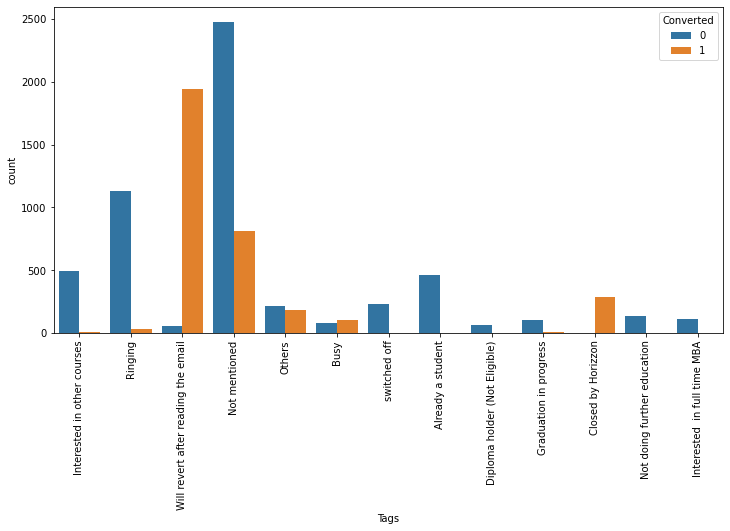

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Tags'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

<div class="alert-info">
    
- From the above graph, we can see that conversion rate is high for `Will revert after reading the email` and `Closed by Horizzon`tags

- Conversion rate is very low for rows having Interested in other courses, Interested  in full time MBA and Ringing tags

In [69]:
# 23 lets start analysing categorical variables

leads['City'].value_counts(dropna=False)

NaN                            3578
Mumbai                         3109
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [70]:
#lets replace missing values in City column with mode of the column as it is important column for analysis 

leads['City'] = leads['City'].replace(np.nan, 'Mumbai')
leads['City'].value_counts(dropna=False)

Mumbai                         6687
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

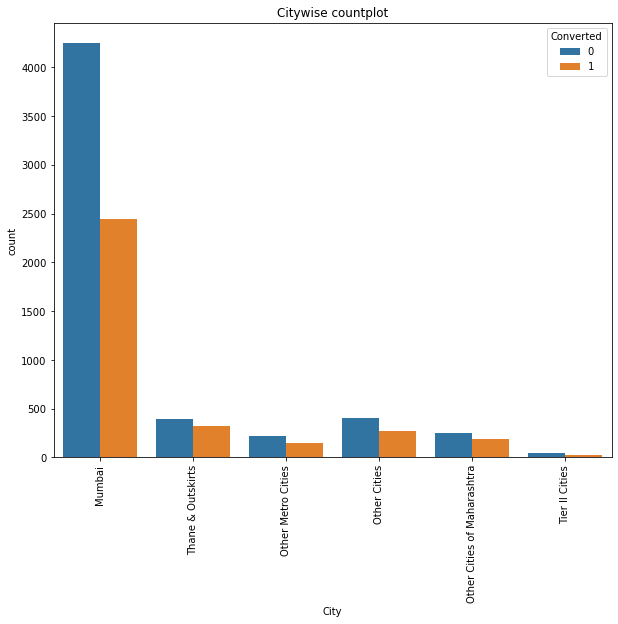

In [71]:
plt.figure(figsize=(10,8))
sns.countplot(leads['City'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.title('Citywise countplot')
plt.show()

<div class="alert-info">
    
- From the above graph, we can see that conversion rate is low for all the cities and need to be improved

In [72]:
#24 lets analyse 'I agree to pay the amount through cheque' column

leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    8953
Name: I agree to pay the amount through cheque, dtype: int64

In [73]:
# I agree to pay the amount through cheque has only column
leads.drop('I agree to pay the amount through cheque', 1, inplace=True)

In [74]:
#25 lets analyse 'A free copy of Mastering The Interview' column

leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6155
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

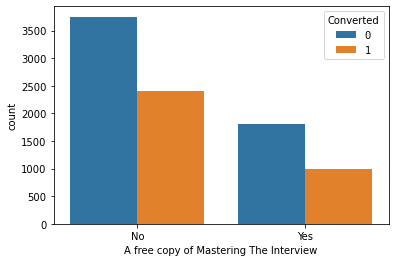

In [75]:
sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads['Converted'])
plt.show()

<div class="alert-info">
Similar trend for converted and non-converted customers

In [76]:
#26 lets analyse 'Last Notable Activity' column

leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3224
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [77]:
#27 lets club low frequency categories into others for better analysis

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received'], 'Others')

leads['Last Notable Activity'].value_counts(dropna=False)

Modified                   3224
Email Opened               2789
SMS Sent                   2143
Page Visited on Website     288
Olark Chat Conversation     182
Email Link Clicked          170
Email Bounced                59
Others                       52
Unsubscribed                 46
Name: Last Notable Activity, dtype: int64

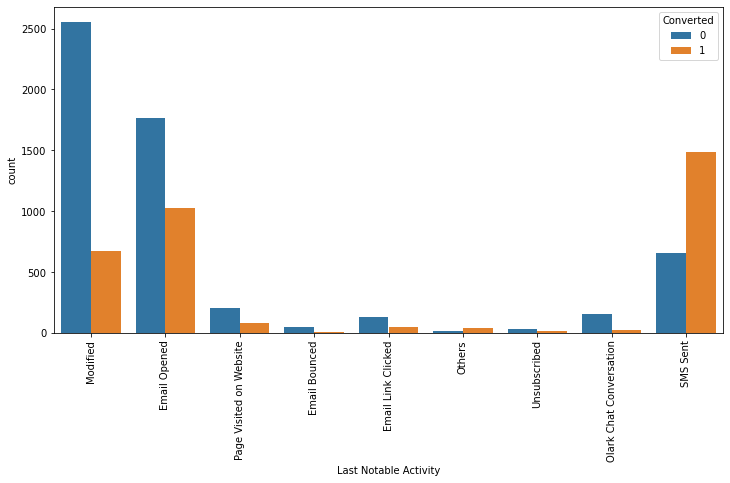

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(leads['Last Notable Activity'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

<div class="alert-info">
    
-we can see that conversion rate is high again where Last notable activity is 'SMS Sent' .
    
-conversion rate is low where activity is 'Modified', 'Olark Chat Conersation' or 'Email Opened'.

### CORRELATION CHECK

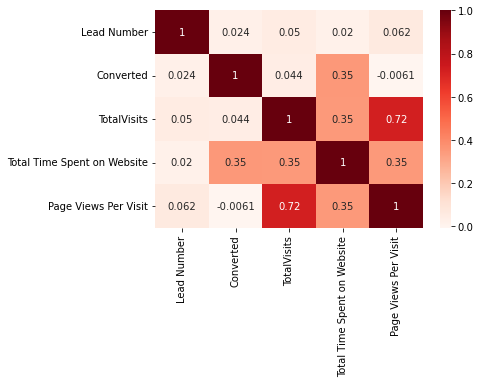

In [79]:
#lets analyse correlation using heatmap
sns.heatmap(leads.corr(), annot=True, cmap='Reds')
plt.show()

<div class="alert-info">

Heatmap shows that `Page Views Per Visit` is highly correlated with `TotalVisits`.

In [80]:
#Recheck for missing values
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8953 non-null   int64  
 1   Lead Origin                             8953 non-null   object 
 2   Lead Source                             8953 non-null   object 
 3   Do Not Email                            8953 non-null   object 
 4   Converted                               8953 non-null   int64  
 5   TotalVisits                             8953 non-null   float64
 6   Total Time Spent on Website             8953 non-null   int64  
 7   Page Views Per Visit                    8953 non-null   float64
 8   Last Activity                           8953 non-null   object 
 9   Specialization                          8953 non-null   object 
 10  What is your current occupation         8953 non-null   obje

## BINARY CONVERSION OF COLUMNS 

In [81]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [82]:
# There are 2 columns with YES and NO which shoul be converted to binary var

binary_var = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_transform(x):
    return x.map({'Yes':1, 'No':0})

leads[binary_var] = leads[binary_var].apply(binary_transform)

leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Mumbai,0,Modified


## DUMMY VARIABLES CREATION TO CONVERT CATG VAR FOR MODELLING


In [83]:
#Creating dummy variables for 'Lead Origin' feature
df = pd.get_dummies(leads[['Lead Origin']], drop_first=True)

leads = pd.concat([leads, df], 1)

leads.drop(['Lead Origin'], axis=1, inplace=True)

In [157]:
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [85]:
#Creating dummy variables for 'Lead Source' feature
df = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')

df.drop('Lead Source_Others', 1, inplace=True)

leads = pd.concat([leads, df], axis=1)

leads.drop(['Lead Source'], axis=1, inplace=True)

In [86]:
leads['Specialization'].value_counts()

Management                           4126
Other Specialization                 3284
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [87]:
#Creating dummy variables for 'Specialization' feature
df = pd.get_dummies(leads['Specialization'], prefix='Specialization')

df.drop('Specialization_Other Specialization', 1, inplace=True)

leads = pd.concat([leads, df], axis=1)

leads.drop(['Specialization'], axis=1, inplace=True)

In [88]:
leads['What is your current occupation'].value_counts()

Unemployed              8053
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [89]:
###Creating dummy variables for 'What is your current occupation' feature
df = pd.get_dummies(leads['What is your current occupation'], prefix='Occupation')

df.drop('Occupation_Other',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('What is your current occupation', 1, inplace=True)

In [90]:
leads.City.value_counts()

Mumbai                         6687
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [91]:
##Creating dummy variables for 'City' feature
df = pd.get_dummies(leads['City'], prefix='City')

df.drop('City_Other Cities',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('City', 1, inplace=True)

In [92]:
#Creating dummy variable for 'Last Activity' feature
df = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')

df.drop('Last Activity_Others',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('Last Activity', 1, inplace=True)

In [93]:
leads.Tags.value_counts()

Not mentioned                          3284
Will revert after reading the email    2002
Ringing                                1162
Interested in other courses             505
Already a student                       461
Others                                  403
Closed by Horizzon                      290
switched off                            237
Busy                                    183
Not doing further education             137
Interested  in full time MBA            116
Graduation in progress                  110
Diploma holder (Not Eligible)            63
Name: Tags, dtype: int64

In [94]:
#Creating dummy variable for 'Tags' feature
df = pd.get_dummies(leads['Tags'], prefix='Tags')

df.drop('Tags_Not mentioned',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('Tags', 1, inplace=True)

In [95]:
#Creating dummy variable for 'Last Notable Activity' feature
df = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity')

df.drop('Last Notable Activity_Others',1,inplace=True)

leads = pd.concat([leads, df], 1)

leads.drop('Last Notable Activity', 1, inplace=True)

In [96]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Number                                       8953 non-null   int64  
 1   Do Not Email                                      8953 non-null   int64  
 2   Converted                                         8953 non-null   int64  
 3   TotalVisits                                       8953 non-null   float64
 4   Total Time Spent on Website                       8953 non-null   int64  
 5   Page Views Per Visit                              8953 non-null   float64
 6   A free copy of Mastering The Interview            8953 non-null   int64  
 7   Lead Origin_Landing Page Submission               8953 non-null   uint8  
 8   Lead Origin_Lead Add Form                         8953 non-null   uint8  
 9   Lead Origin_Lead Im

<div class="alert-info">

From above we can see that there are no any categorical variables present .

## Test and Train split

In [97]:
# Creating X and y variables for modelling

from sklearn.model_selection import train_test_split

y = leads['Converted']

X = leads.drop('Converted', 1)

In [98]:
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,0,2.0,1532,2.0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,660681,0,2.0,1428,1.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [99]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [100]:
X.shape

(8953, 66)

In [101]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [102]:
final_train_leads = X_train['Lead Number']
final_test_leads = X_test['Lead Number']

X_train.drop('Lead Number', 1, inplace=True)
X_test.drop('Lead Number', 1, inplace=True)

In [103]:
X_train.shape

(6267, 65)

In [104]:
X_test.shape

(2686, 65)

## FEATURE SCALING

In [105]:
#Scaling the variables using StandardScaler

from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
9196,0,0.668862,1.848117,1.455819,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4696,0,-0.030697,-0.037832,0.399961,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3274,0,0.319082,-0.642138,-0.127967,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2164,0,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,0,0.319082,1.258415,-0.481679,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [107]:
# Checking for conversion rate
Coversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Coversion

37.92025019546521

<div class="alert-info">
From the dataset, we can see that conversion rate is almost 38%

 </div>

## MODEL BUILDING

In [108]:
import statsmodels.api as sm

In [109]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6201
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.2
Date:                Sun, 26 Feb 2023   Deviance:                       2584.3
Time:                        14:33:17   Pearson chi2:                 9.34e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6000
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.0998      1.890     -0.053      0.958      -3.804       3.605
Do Not Email                                        -1.0433      0.303     -3.441      0.001      -1.638      -0.449
TotalVisits                                          0.2719      0.074      3.692      0.000       0.128       0.416
Total Time Spent on Website                          1.1173      0.061     18.281      0.000       0.997       1.237
Page Views Per Visit                                -0.3696      0.091     -4.050      0.000      -0.548      -0.191
A free copy of Mastering The Interview              -0.1149      0.175     -0.656      0.512      -0.458       0.229
Lead Origin_Landing Page Submission                 -0.5653      0.224     -2.526      0.012      -1.004      -0.127
Lead Origin_Lead Add Form                            1.3198      1.146      1.152      0.249      -0.926       3.566
Lead Origin_Lead Import                             22.8473   2.46e+04      0.001      0.999   -4.82e+04    4.83e+04
Lead Source_Direct Traffic                          -1.7127      0.922     -1.858      0.063      -3.519       0.094
Lead Source_Facebook                               -23.7287   2.46e+04     -0.001      0.999   -4.83e+04    4.82e+04
Lead Source_Google                                  -1.4873      0.913     -1.630      0.103      -3.276       0.301
Lead Source_Olark Chat                              -0.6858      0.921     -0.745      0.456      -2.490       1.119
Lead Source_Organic Search                          -1.5955      0.927     -1.721      0.085      -3.412       0.221
Lead Source_Reference                               -1.5212      1.014     -1.501      0.133      -3.508       0.465
Lead Source_Referral Sites                          -1.8407      1.028     -1.790      0.073      -3.856       0.175
Lead Source_Welingak Website                         3.0113      1.363      2.210      0.027       0.341       5.682
Specialization_Banking, Investment And Insurance     0.5353      0.359      1.491      0.136      -0.168       1.239
Specialization_Business Administration               0.1057      0.331      0.320      0.749      -0.542       0.754
Specialization_E-Business                            0.1910      0.621      0.308      0.758      -1.026       1.408
Specialization_E-COMMERCE                            0.3677      0.502      0.733      0.464      -0.616       1.351
Specialization_International Business               -0.2021      0.446     -0.453      0.651      -1.077       0.673
Specialization_Management                            0.0818      0.225      0.364      0.716      -0.359       0.523
Specialization_Media and Advertising     

## FEATURE SELECTION USING RFE

In [110]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [111]:
#select top 15 features using RFE

from sklearn.feature_selection import RFE

rfe = RFE(log_reg,n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False])

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 27),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', False, 32),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 21),
 ('Specialization_Business Administration', False, 43),
 ('Specialization_E-Business', False, 40),
 ('Specialization_E-COMMERCE', False, 29),
 ('Specialization_International Business', False, 45),
 ('Specialization_Management', False, 42),
 ('Specialization_Media and Advertising'

In [114]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [115]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Occupation_Businessman',
       'Occupation_Housewife', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'City_Mumbai',
       'City_Other Cities of Mahara

## Assessing the model with StatsModels

In [116]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1610.0
Date:                Sun, 26 Feb 2023   Deviance:                       3219.9
Time:                        14:33:39   Pearson chi2:                 8.08e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5573
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3094      0.060    -21.878      0.000      -1.427      -1.192
Do Not Email                                -1.3051      0.206     -6.340      0.000      -1.709      -0.902
Lead Origin_Lead Add Form                    1.4355      0.371      3.866      0.000       0.708       2.163
Lead Source_Referral Sites                  -0.3761      0.422     -0.892      0.372      -1.202       0.450
Lead Source_Welingak Website                 3.6796      1.080      3.408      0.001       1.563       5.796
Last Activity_Olark Chat Conversation       -1.5142      0.197     -7.676      0.000      -1.901      -1.128
Tags_Already a student                      -3.5517      0.712     -4.989      0.000      -4.947      -2.156
Tags_Closed by Horizzon                      6.2905      1.008      6.242      0.000       4.315       8.266
Tags_Diploma holder (Not Eligible)          -2.2027      1.017     -2.165      0.030      -4.197      -0.209
Tags_Interested  in full time MBA           -1.7353      0.593     -2.926      0.003      -2.897      -0.573
Tags_Interested in other courses            -2.2978      0.367     -6.264      0.000      -3.017      -1.579
Tags_Not doing further education            -2.8276      1.009     -2.803      0.005      -4.805      -0.850
Tags_Ringing                                -3.4116      0.228    -14.953      0.000      -3.859      -2.964
Tags_Will revert after reading the email     4.2576      0.169     25.206      0.000       3.927       4.589
Tags_switched off                           -3.9123      0.594     -6.588      0.000      -5.076      -2.748
Last Notable Activity_SMS Sent               2.1971      0.111     19.707      0.000       1.979       2.416
============================================================================================================
"""


<div class="alert-info">
    
'Lead Source_Referral Sites' feature has higher p-value, hence we will drop this.

In [117]:
cols = cols.drop('Lead Source_Referral Sites', 1)


X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1610.4
Date:                Sun, 26 Feb 2023   Deviance:                       3220.8
Time:                        14:33:40   Pearson chi2:                 8.08e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5573
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3150      0.060    -22.073      0.000      -1.432      -1.198
Do Not Email                                -1.3041      0.206     -6.338      0.000      -1.707      -0.901
Lead Origin_Lead Add Form                    1.4403      0.371      3.880      0.000       0.713       2.168
Lead Source_Welingak Website                 3.6798      1.080      3.408      0.001       1.563       5.796
Last Activity_Olark Chat Conversation       -1.5124      0.197     -7.660      0.000      -1.899      -1.125
Tags_Already a student                      -3.5465      0.712     -4.981      0.000      -4.942      -2.151
Tags_Closed by Horizzon                      6.2921      1.008      6.244      0.000       4.317       8.267
Tags_Diploma holder (Not Eligible)          -2.1975      1.017     -2.160      0.031      -4.191      -0.204
Tags_Interested  in full time MBA           -1.7346      0.593     -2.925      0.003      -2.897      -0.572
Tags_Interested in other courses            -2.3226      0.367     -6.337      0.000      -3.041      -1.604
Tags_Not doing further education            -2.8222      1.009     -2.797      0.005      -4.800      -0.845
Tags_Ringing                                -3.4104      0.228    -14.948      0.000      -3.858      -2.963
Tags_Will revert after reading the email     4.2552      0.169     25.208      0.000       3.924       4.586
Tags_switched off                           -3.9159      0.594     -6.595      0.000      -5.080      -2.752
Last Notable Activity_SMS Sent               2.2010      0.111     19.762      0.000       1.983       2.419
============================================================================================================
"""


<div class="alert-info">
    
'Tags_Diploma holder (Not Eligible)' feature has higher p-value, hence we will drop this.

In [118]:
cols = cols.drop('Tags_Diploma holder (Not Eligible)', 1)


X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1615.3
Date:                Sun, 26 Feb 2023   Deviance:                       3230.6
Time:                        14:33:41   Pearson chi2:                 8.15e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5566
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3346      0.059    -22.478      0.000      -1.451      -1.218
Do Not Email                                -1.3085      0.206     -6.353      0.000      -1.712      -0.905
Lead Origin_Lead Add Form                    1.4489      0.371      3.903      0.000       0.721       2.177
Lead Source_Welingak Website                 3.6895      1.080      3.416      0.001       1.573       5.806
Last Activity_Olark Chat Conversation       -1.5026      0.197     -7.608      0.000      -1.890      -1.116
Tags_Already a student                      -3.5273      0.712     -4.955      0.000      -4.923      -2.132
Tags_Closed by Horizzon                      6.3094      1.008      6.261      0.000       4.334       8.285
Tags_Interested  in full time MBA           -1.7154      0.593     -2.893      0.004      -2.878      -0.553
Tags_Interested in other courses            -2.3057      0.367     -6.290      0.000      -3.024      -1.587
Tags_Not doing further education            -2.8022      1.009     -2.777      0.005      -4.780      -0.825
Tags_Ringing                                -3.4037      0.228    -14.910      0.000      -3.851      -2.956
Tags_Will revert after reading the email     4.2725      0.169     25.316      0.000       3.942       4.603
Tags_switched off                           -3.9086      0.594     -6.581      0.000      -5.073      -2.745
Last Notable Activity_SMS Sent               2.2163      0.111     19.921      0.000       1.998       2.434
============================================================================================================
"""

### Checking VIF's 

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.63
12,Last Notable Activity_SMS Sent,1.43
10,Tags_Will revert after reading the email,1.40
2,Lead Source_Welingak Website,1.33
5,Tags_Closed by Horizzon,1.13
9,Tags_Ringing,1.09
0,Do Not Email,1.06
3,Last Activity_Olark Chat Conversation,1.06
4,Tags_Already a student,1.03
7,Tags_Interested in other courses,1.03


In [121]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.07433117, 0.07433117, 0.70717475, 0.00580706, 0.9496915 ,
       0.20840311, 0.05534715, 0.20840311, 0.01042954, 0.20840311])

In [122]:
df = pd.DataFrame({'Converted_Actual':y_train, 'Converted_Pred':y_train_pred})
df['Lead Number'] = final_train_leads

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

df['Predicted'] = df['Converted_Pred'].map(lambda x: 1 if x > 0.5 else 0)
df

,Converted_Actual,Converted_Pred,Lead Number,Predicted
9196,1,0.074331,579918,0
4696,0,0.074331,614744,0
3274,0,0.707175,628615,1
2164,0,0.005807,639044,0
1667,1,0.949692,643101,1
...,...,...,...,...
379,1,0.949692,656457,1
84,1,0.949692,659696,1
8313,0,0.007676,586377,0
7169,0,0.208403,594504,0


### Model evaluation on the train data

In [123]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [124]:
print("Accuracy: ",  accuracy_score(df['Converted_Actual'], df['Predicted']))
print("Sensitivity/Recall: ", recall_score(df['Converted_Actual'], df['Predicted']))
print("Precision: ", precision_score(df['Converted_Actual'], df['Predicted']))
print("F1-Score: ", f1_score(df['Converted_Actual'], df['Predicted']))
print("ROC AUC Score: ", roc_auc_score(df['Converted_Actual'], df['Predicted']))

Accuracy:  0.9041008456996968
Sensitivity/Recall:  0.8218029350104822
Precision:  0.9176029962546817
F1-Score:  0.8670648086706481
ROC AUC Score:  0.888232740045169


In [125]:
confusion = metrics.confusion_matrix(df['Converted_Actual'], df['Predicted'])
confusion

array([[3706,  176],
       [ 425, 1960]], dtype=int64)

### Metrics beyond simply accuracy 

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8218029350104822

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.9546625450798557

In [129]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04533745492014426


In [130]:
# positive predictive value 
print (TP / float(TP+FP))

0.9176029962546817


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.897119341563786


### Plotting the ROC curve

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

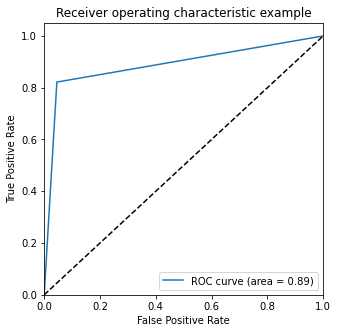

In [133]:
draw_roc(df['Converted_Actual'], df['Predicted'])

### Finding optimal cutoff point


In [134]:
nums = [float(i/10) for i in range(10)]

for i in nums:
    df[i] = df['Converted_Pred'].map(lambda x: 1 if x>i else 0)

df.head()

,Converted_Actual,Converted_Pred,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1,0.074331,579918,0,1,0,0,0,0,0,0,0,0,0
4696,0,0.074331,614744,0,1,0,0,0,0,0,0,0,0,0
3274,0,0.707175,628615,1,1,1,1,1,1,1,1,1,0,0
2164,0,0.005807,639044,0,1,0,0,0,0,0,0,0,0,0
1667,1,0.949692,643101,1,1,1,1,1,1,1,1,1,1,1


In [135]:
#lets calculate accuracy, sensitivity, specificity for various cutoffs

cutoff_df = pd.DataFrame(columns=['Prob', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in nums:
    c = metrics.confusion_matrix(df['Converted_Actual'], df[i])
    accuracy = accuracy_score(df['Converted_Actual'], df[i])
    sensitivity = recall_score(df['Converted_Actual'], df[i])
    specificity = c[0,0]/(c[0,0]+c[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
cutoff_df

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.380565,1.000000,0.000000
0.1,0.1,0.752194,0.970231,0.618238
0.2,0.2,0.751875,0.968134,0.619011
0.3,0.3,0.902984,0.826834,0.949768
0.4,0.4,0.904101,0.821803,0.954663
0.5,0.5,0.904101,0.821803,0.954663
0.6,0.6,0.903463,0.818449,0.955693
0.7,0.7,0.903463,0.818449,0.955693
0.8,0.8,0.874262,0.688050,0.988666
0.9,0.9,0.870432,0.674633,0.990726


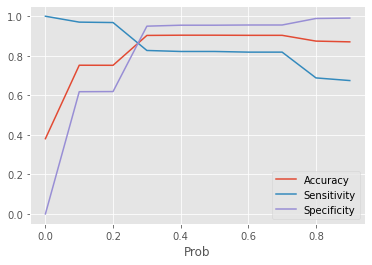

In [136]:
#plot accuracy, sensitivity and specificity for various cutoffs
plt.style.use('ggplot')
cutoff_df.plot(x='Prob',y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

 
<div class="alert-info">
 From the curve above, We can consider the cutoff probablity around 0.28 .


In [137]:
df['Predicted'] = df['Converted_Pred'].map(lambda x: 1 if x > 0.28 else 0)
df

,Converted_Actual,Converted_Pred,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1,0.074331,579918,0,1,0,0,0,0,0,0,0,0,0
4696,0,0.074331,614744,0,1,0,0,0,0,0,0,0,0,0
3274,0,0.707175,628615,1,1,1,1,1,1,1,1,1,0,0
2164,0,0.005807,639044,0,1,0,0,0,0,0,0,0,0,0
1667,1,0.949692,643101,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,1,0.949692,656457,1,1,1,1,1,1,1,1,1,1,1
84,1,0.949692,659696,1,1,1,1,1,1,1,1,1,1,1
8313,0,0.007676,586377,0,1,0,0,0,0,0,0,0,0,0
7169,0,0.208403,594504,0,1,1,1,0,0,0,0,0,0,0


In [138]:
print("Accuracy: ", accuracy_score(df['Converted_Actual'], df['Predicted']))
print("Sensitivity/Recall: ", recall_score(df['Converted_Actual'], df['Predicted']))
print("Precision: ", precision_score(df['Converted_Actual'], df['Predicted']))
print("F1-Score: ", f1_score(df['Converted_Actual'], df['Predicted']))
print("ROC AUC Score: ", roc_auc_score(df['Converted_Actual'], df['Predicted']))

Accuracy:  0.9029838838359662
Sensitivity/Recall:  0.8268343815513627
Precision:  0.9100138440239963
F1-Score:  0.8664323374340949
ROC AUC Score:  0.8883012711466242


In [139]:
for i in nums:
    df.drop(i, 1, inplace=True)

df

,Converted_Actual,Converted_Pred,Lead Number,Predicted
9196,1,0.074331,579918,0
4696,0,0.074331,614744,0
3274,0,0.707175,628615,1
2164,0,0.005807,639044,0
1667,1,0.949692,643101,1
...,...,...,...,...
379,1,0.949692,656457,1
84,1,0.949692,659696,1
8313,0,0.007676,586377,0
7169,0,0.208403,594504,0


In [140]:
#Adding column for Lead Score
df['Lead Score'] = round(df['Converted_Pred'],2)*100
df

,Converted_Actual,Converted_Pred,Lead Number,Predicted,Lead Score
9196,1,0.074331,579918,0,7.0
4696,0,0.074331,614744,0,7.0
3274,0,0.707175,628615,1,71.0
2164,0,0.005807,639044,0,1.0
1667,1,0.949692,643101,1,95.0
...,...,...,...,...,...
379,1,0.949692,656457,1,95.0
84,1,0.949692,659696,1,95.0
8313,0,0.007676,586377,0,1.0
7169,0,0.208403,594504,0,21.0


In [141]:
confusion = metrics.confusion_matrix(df['Converted_Actual'], df['Predicted'])

specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])

specificity

0.9497681607418856

In [142]:
confusion

array([[3687,  195],
       [ 413, 1972]], dtype=int64)

In [143]:
# Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

In [144]:
df['Converted_Actual'], df['Predicted']

(9196    1
 4696    0
 3274    0
 2164    0
 1667    1
        ..
 379     1
 84      1
 8313    0
 7169    0
 5825    1
 Name: Converted_Actual, Length: 6267, dtype: int64,
 9196    0
 4696    0
 3274    1
 2164    0
 1667    1
        ..
 379     1
 84      1
 8313    0
 7169    0
 5825    1
 Name: Predicted, Length: 6267, dtype: int64)

In [145]:
p, r, thresholds = precision_recall_curve(df['Converted_Actual'], df['Predicted'])

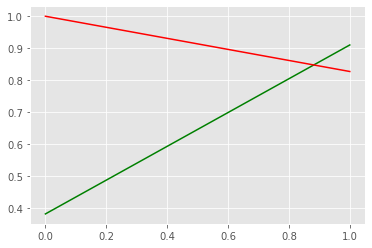

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<div class="alert-info">
    
From the above data, we can see that model is performing well.
- Accuracy = 90.29%
- Sensitivity/Recall = 82.68%
- Specificity = 94.97%
- Precision = 91.00%
- F1-Score = 86.64%
- ROC AUC Score = 88.83%

### SCALING TEST DATA

In [147]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
7681,0,0.668862,-0.304384,0.135997,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
984,0,-0.030697,-0.538073,0.399961,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8135,1,-0.380477,0.794688,-0.127967,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6915,0,0.319082,-0.614753,-0.127967,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2712,0,-0.030697,-0.412100,0.399961,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [148]:
X_test_sm = sm.add_constant(X_test[cols])
y_test_pred = res.predict(X_test_sm)
y_test_pred

7681    0.074331
984     0.007676
8135    0.394895
6915    0.008678
2712    0.949692
          ...   
9029    0.055347
1420    0.055347
5996    0.993138
4143    0.025575
1005    0.208403
Length: 2686, dtype: float64

In [149]:
df_test = pd.DataFrame()
df_test['Converted_Pred'] = y_test_pred
df_test['Converted_Actual'] = y_test
df_test['Lead Number'] = final_test_leads
df_test['Predicted'] = df_test['Converted_Pred'].map(lambda x: 1 if x > 0.28 else 0)
df_test

,Converted_Pred,Converted_Actual,Lead Number,Predicted
7681,0.074331,0,590917,0
984,0.007676,0,649656,0
8135,0.394895,0,587703,1
6915,0.008678,0,596565,0
2712,0.949692,1,633680,1
...,...,...,...,...
9029,0.055347,1,581159,0
1420,0.055347,0,645215,0
5996,0.993138,1,603809,1
4143,0.025575,0,620226,0


In [150]:
#accuracy
metrics.accuracy_score(df_test['Converted_Actual'], df_test['Predicted'])

0.9032017870439315

In [151]:
#recall/sensitivity
metrics.recall_score(df_test['Converted_Actual'], df_test['Predicted'])

0.8198019801980198

In [152]:
#precision
metrics.precision_score(df_test['Converted_Actual'], df_test['Predicted'])

0.9139072847682119

In [153]:
#F1-score
metrics.f1_score(df_test['Converted_Actual'], df_test['Predicted'])

0.8643006263048016

In [154]:
#Area under ROC curve
metrics.roc_auc_score(df_test['Converted_Actual'], df_test['Predicted'])

0.8866313003615396

In [155]:
#specificity
conprd = metrics.confusion_matrix(df_test['Converted_Actual'], df_test['Predicted'])

specificity = c[0,0]/(c[0,0] + c[0,1])

specificity

0.990726429675425

In [156]:
conprd

array([[1598,   78],
       [ 182,  828]], dtype=int64)

<div class="alert-info">

### TRAIN DATA SET
- Accuracy = 90.29%
- Sensitivity/Recall = 82.68%
- Specificity = 94.97%
- Precision = 91.00%
- F1-Score = 86.64%
- ROC AUC Score = 88.83

<div class="alert-info">

### TEST DATA SET
- Accuracy = 90.32%
- Sensitivity/Recall = 81.98%
- Specificity = 95.34%
- Precision = 91.39%
- F1-Score = 86.43%
- ROC AUC Score = 88.66